In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import sys
sys.path.append("../")

from python.model_check import ModelCheck

In [2]:
model_check = ModelCheck()

In [3]:
file_stem = "output/output/"
file_list = [file_stem+"fit_sim_icecube_1000_singlesource.h5",
             file_stem+"fit_sim_icecube_9900_singlesource.h5"]
#file_list = [file_stem+"fit_sim_42_test.h5"]

model_check.load(file_list)

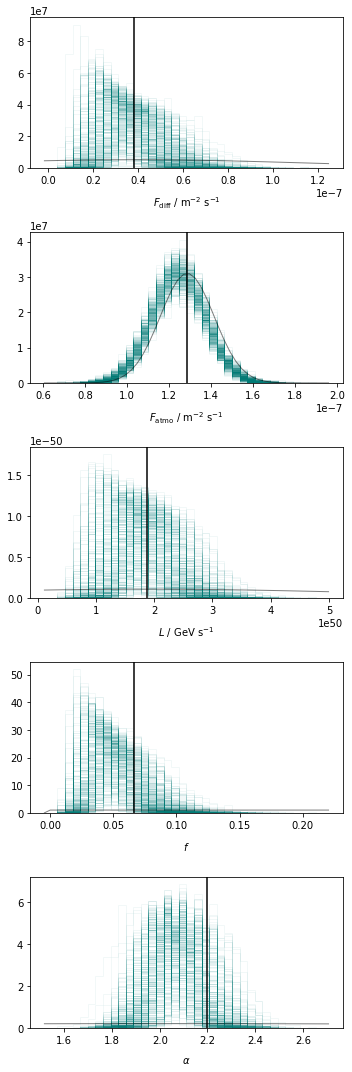

In [4]:
fig, ax = model_check.compare(show_prior=True)

In [5]:
#plt.style.use("minimalist")

In [7]:
#fig.savefig("figures/catalog_sim_study.pdf", dpi=500, bbox_inches="tight")